In [215]:
import pandas as pd
from utils import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import numpy as np
import matplotlib.pyplot as plt

In [216]:
def LR_Train_By_Year(df:pd.DataFrame):
    # df = df.drop(index=df[df['Year'] == 2020].index) # (2020 was the year when Covid-19 started spreading globally)
    # Dropping the year 2020 results with worse R2 values so we decided to keep it in

    year = 2018 # cutoff year to train upto
    train = df[df["Year"] <= year]
    test = df[df["Year"] > year]

    X_train = train[["Year"]].values
    X_test = test[["Year"]].values
    y_train = train[["Total Reviews"]].values
    y_test = test[["Total Reviews"]].values
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test.reshape(-1, 1))
    score = round(r2_score(y_test, y_pred), 3)

    # print(reg.intercept_, reg.coef_)
    # for test, pred in zip(y_test, y_pred):
    #     print(f"y_test= {test[0]}, y_pred= {pred[0]}, %= {pred[0]/test[0]*100}")
    # print(f"R2: {score}")

    line_plot = reg.predict(df["Year"].values.reshape(-1,1))

    return df, line_plot, score

In [217]:
# Display the linear regression line and plotting the actual values we wanted to predict

def Display_LR_Plot(df_ML:pd.DataFrame, df_main:pd.DataFrame, line_plot, axis:pd.DataFrame.axes, title, score, color):
   
    axis.scatter(x = df_main["Year"], y = df_main["Total Reviews"], color="black")
    axis.plot(df_ML["Year"], line_plot, color=color)

    title = title[::-1] + f'\nR2: { score }' 
    axis.set_title(title, fontsize=16)

    axis.set_ymargin(0.15)
    axis.set_xlabel("Year")
    axis.set_ylabel("Total Reviews")

    axis.set_xticks(df_main["Year"], dtype=float)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

    axis.set_ylim(bottom=0)

In [218]:
# We tried improving our accuracy and dealing with negative R2 values and tried training by month count and years
# We figured that increasing the data points to train upton will improve our results, but it didn't solve the problem

def LR_Train_By_Months(df:pd.DataFrame, cat):
    max_month = df["Month"].max()
    df_main = df.copy()
    
    num_of_month_to_predict = 36
    train = df[0 : max_month - num_of_month_to_predict + 1]
    test = df[-num_of_month_to_predict::]

    X_train = train[["Month"]].values
    X_test = test[["Month"]].values
    y_train = train[["Total Reviews"]].values
    y_test = test[["Total Reviews"]].values
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test.reshape(-1, 1))
    score = round(r2_score(y_test, y_pred), 3) 
    # print(reg.intercept_, reg.coef_)

    # for test, pred in zip(y_test, y_pred):
    #     print(f"y_test= {test[0]}, y_pred= {pred[0]}, %= {pred[0]/test[0]*100}")
    print(f"R2: {score}")

   # line = reg.predict(df["Year"].values.reshape(-1,1))

    return df, df_main, y_pred, score, y_test


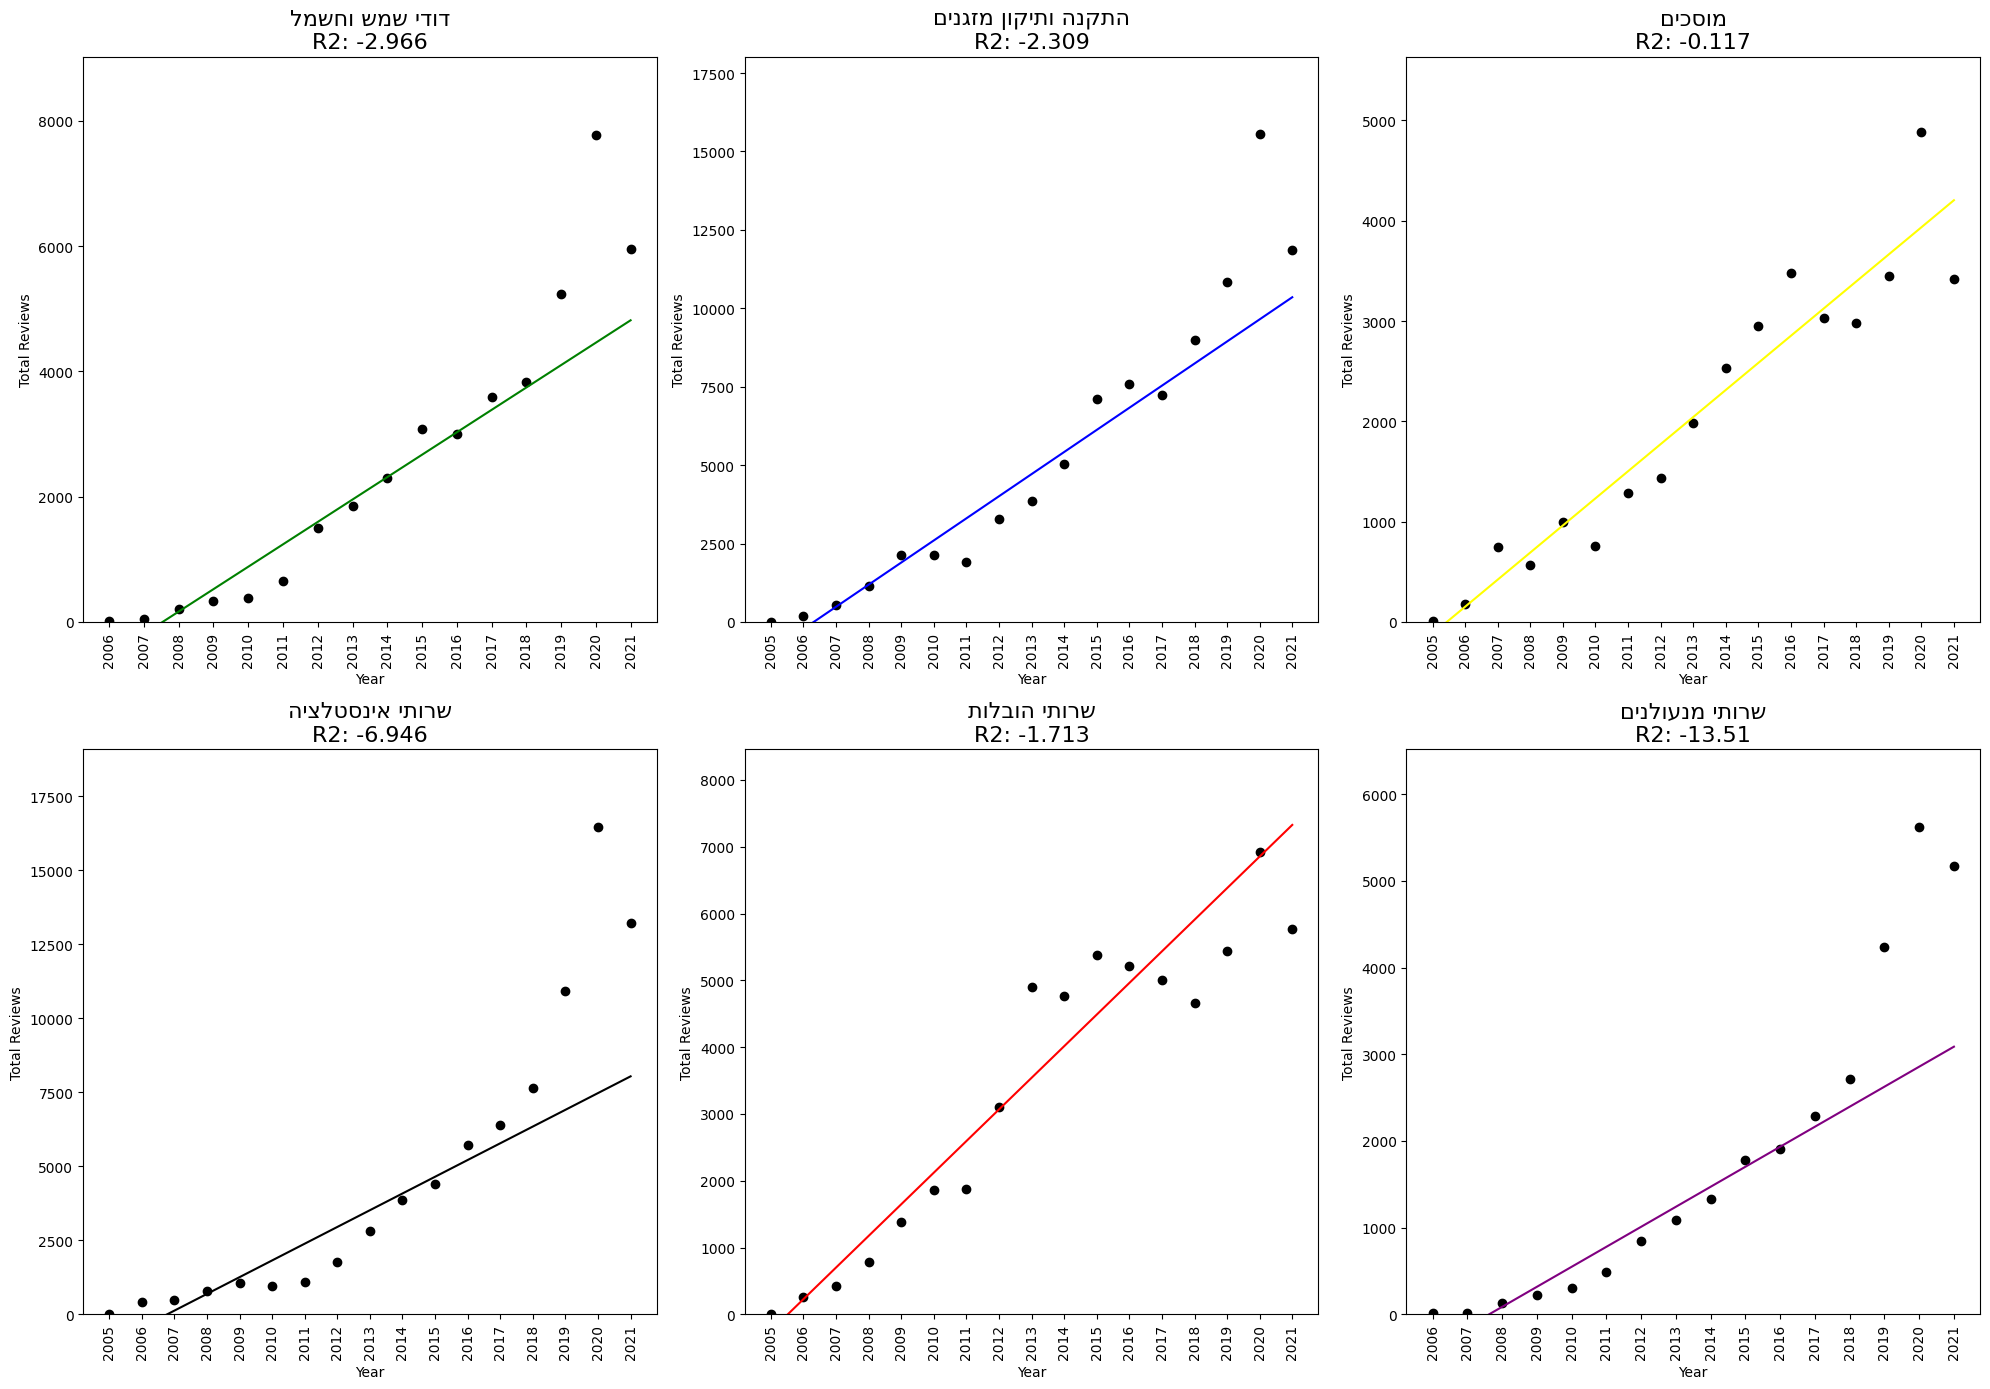

In [219]:
# Creating a Linear Regression Model to predict the total reviews of 2019-2021 based on data of total reviews from 2005/6-2018
#       and visualizing it with SubPlots

directory = 'data/ML/'
 
fig, axes = plt.subplots(2,3, figsize=(20,14))
colors = [
    ['green', 'blue','yellow'],
    ['black', 'red', 'purple']
]

row, index = 0, 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename.startswith("summery_"):
    # if os.path.isfile(f) and filename.startswith("By_Month_"):
        main_df = pd.read_csv(f)

        lr_ml_df, lr_line, lr_r2_score = LR_Train_By_Year(main_df)

        Display_LR_Plot(lr_ml_df, main_df, lr_line, axes[row, index], filename.replace('summery_', '').replace('.csv', ''), lr_r2_score, colors[row][index])
        
        if index == 2:
            row = 1
            index = 0
        else:
            index+=1

fig.tight_layout()